# Support Vector Machine Regressor and Classifier

In [1]:
# Importing necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub as kh
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Regression

### Loading, Defining and Understanding the Dataset

In [3]:
path = kh.dataset_download("anubhavgoyal10/laptop-prices-dataset")
df = pd.read_csv(f'{path}/laptopPrice.csv')

In [4]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [5]:
df['msoffice'].value_counts()

msoffice
No     542
Yes    281
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [7]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


### Visualization

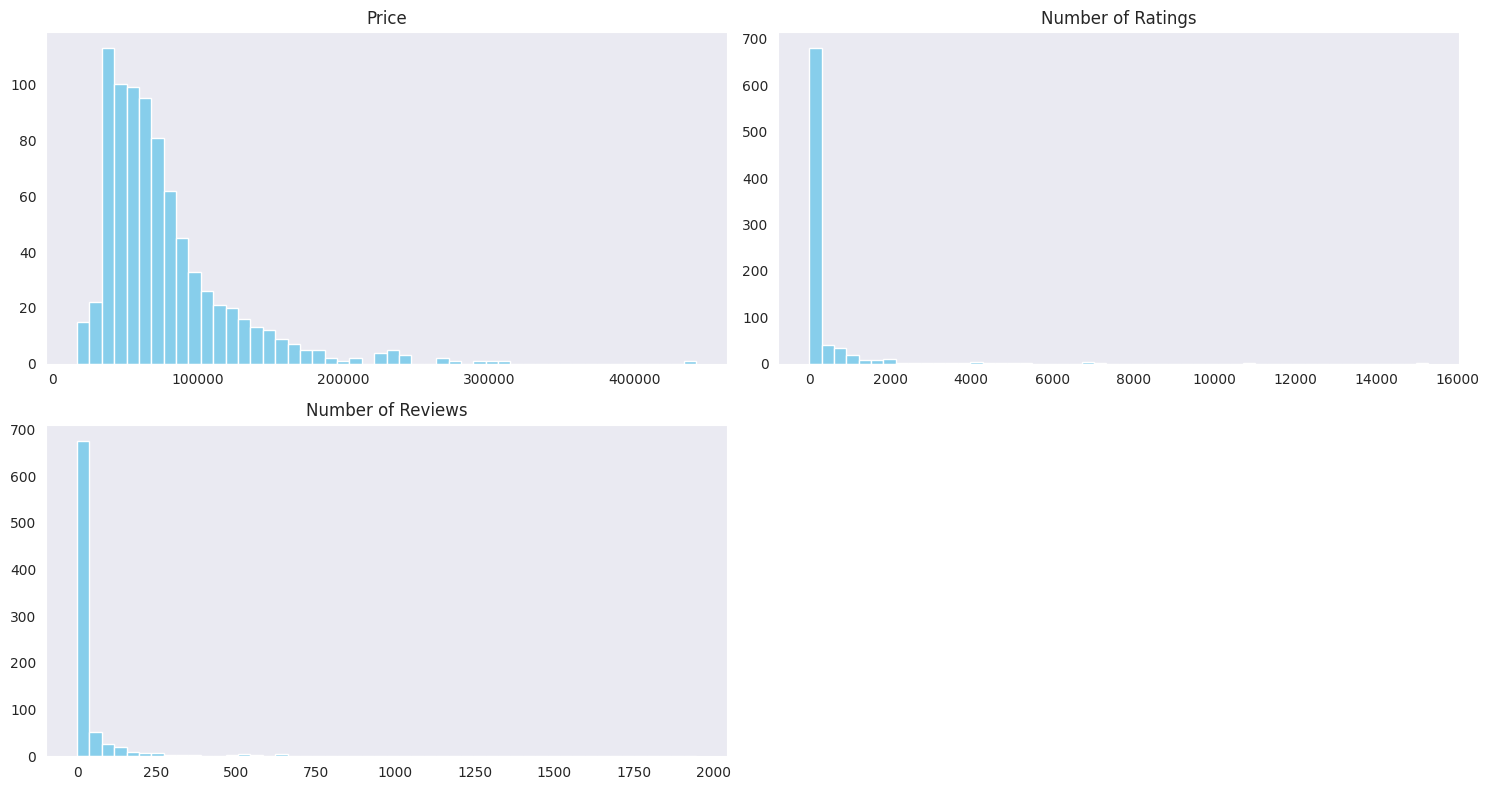

In [8]:
cols = df.select_dtypes(include=[np.number]).columns
df[cols].hist(figsize=(15, 8), bins=50, grid=False, color='skyblue')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

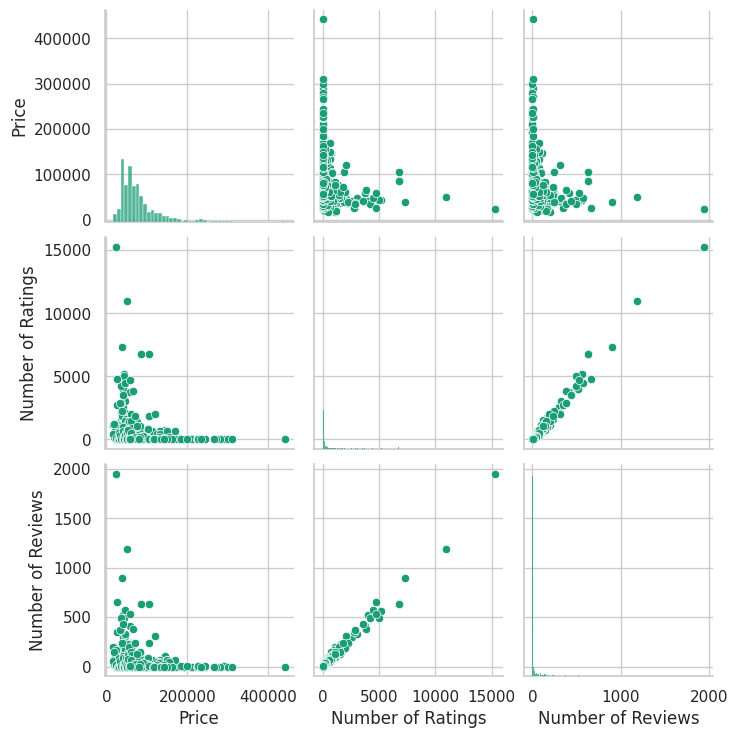

In [9]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette("Dark2")
sns.despine()

sns.pairplot(df);

### Preprocessing

In [10]:
# Split the dataset into cat_cols and num_cols
cat_cols = df.select_dtypes(include=[object]).columns
num_cols = df.select_dtypes(include=[np.number]).columns

In [11]:
# Encode the categorical columns with pandas dummies
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [12]:
# Convert boolean columns to int64
df = df.astype({col: 'int64' for col in df.select_dtypes(include=['bool']).columns})

In [13]:
# Standardize the numerical columns
stc = StandardScaler()

df[num_cols] = stc.fit_transform(df[num_cols])

In [14]:
df.describe()

,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
count,8.230000e+02,8.230000e+02,8.230000e+02,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,...,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000,823.000000
mean,1.381371e-16,-1.726714e-17,-1.726714e-17,0.302552,0.017011,0.183475,0.165249,0.174970,0.060753,0.061968,...,0.320778,0.027947,0.015796,0.337789,0.117861,0.341434,0.010936,0.427704,0.539490,0.019441
std,1.000608e+00,1.000608e+00,1.000608e+00,0.459642,0.129391,0.387291,0.371631,0.380172,0.239023,0.241245,...,0.467059,0.164920,0.124761,0.473244,0.322640,0.474479,0.104063,0.495046,0.498741,0.138153
min,-1.325702e+00,-3.012204e-01,-3.091551e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.799911e-01,-3.012204e-01,-3.091551e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.607951e-01,-2.849796e-01,-2.927150e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.859900e-01,-1.679503e-01,-1.611945e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,8.103158e+00,1.429544e+01,1.569525e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.head()

,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,-0.933927,-0.298354,-0.309155,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,-0.837420,-0.239123,-0.268055,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,-0.815234,-0.293578,-0.300935,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,-0.149867,-0.301220,-0.309155,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,-1.103846,-0.301220,-0.309155,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [16]:
# Split the dataset into X and y
X = df.drop('Price', axis=1)
y = df['Price']

### Training, Predicting and Evaluating

In [17]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Initialize the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=1, gamma='scale')

In [19]:
# Fit the model to the data
svr.fit(X_train, y_train)

SVR(epsilon=1)

In [20]:
# Predict the test set
y_pred = svr.predict(X_test)

In [21]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [22]:
print(f'R2: {r2}')
print(f'RMSE: {rmse}')

R2: 0.2381463380241201
RMSE: 0.8397323143739845


### Hyperparameter Tuning

In [23]:
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.5, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.5, 1]
}

# Initialize the SVR model
svr_grid = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr_grid, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.7231669379056264


In [24]:
# Initialize the SVR model with the best parameters
svr_best = SVR(**best_params)
svr_best.fit(X_train, y_train)

SVR(C=10)

In [25]:
# Predict the test set
y_pred_best = svr_best.predict(X_test)

# Evaluate the model
r2_best = r2_score(y_test, y_pred_best)
rmse_best = root_mean_squared_error(y_test, y_pred_best)


In [26]:
print(f'R2: {r2_best}')
print(f'RMSE: {rmse_best}')

R2: 0.7652452145714184
RMSE: 0.4661356438234889


## Classification

### Loading, Defining and Understanding the Dataset

In [27]:
# Load the dataset
path = kh.dataset_download("mujtabamatin/air-quality-and-pollution-assessment")
df = pd.read_csv(f'{path}/updated_pollution_dataset.csv')

In [28]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [30]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [31]:
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [32]:
df.duplicated().sum()

np.int64(0)

### Visualization

In [33]:
num_cols = df.select_dtypes(include=[np.number]).columns

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'PM2.5'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'Proximity_to_Industrial_Areas'}>,
        <Axes: title={'center': 'Population_Density'}>]], dtype=object)

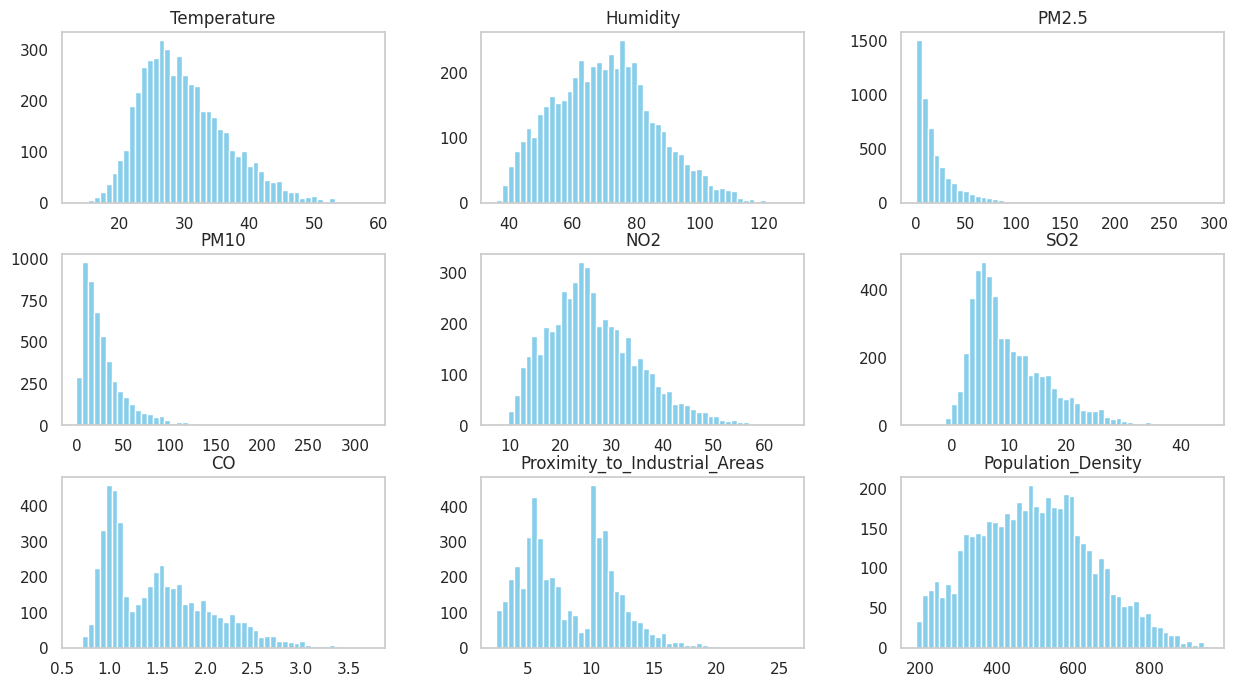

In [34]:
df[num_cols].hist(figsize=(15, 8), bins=50, grid=False, color='skyblue')

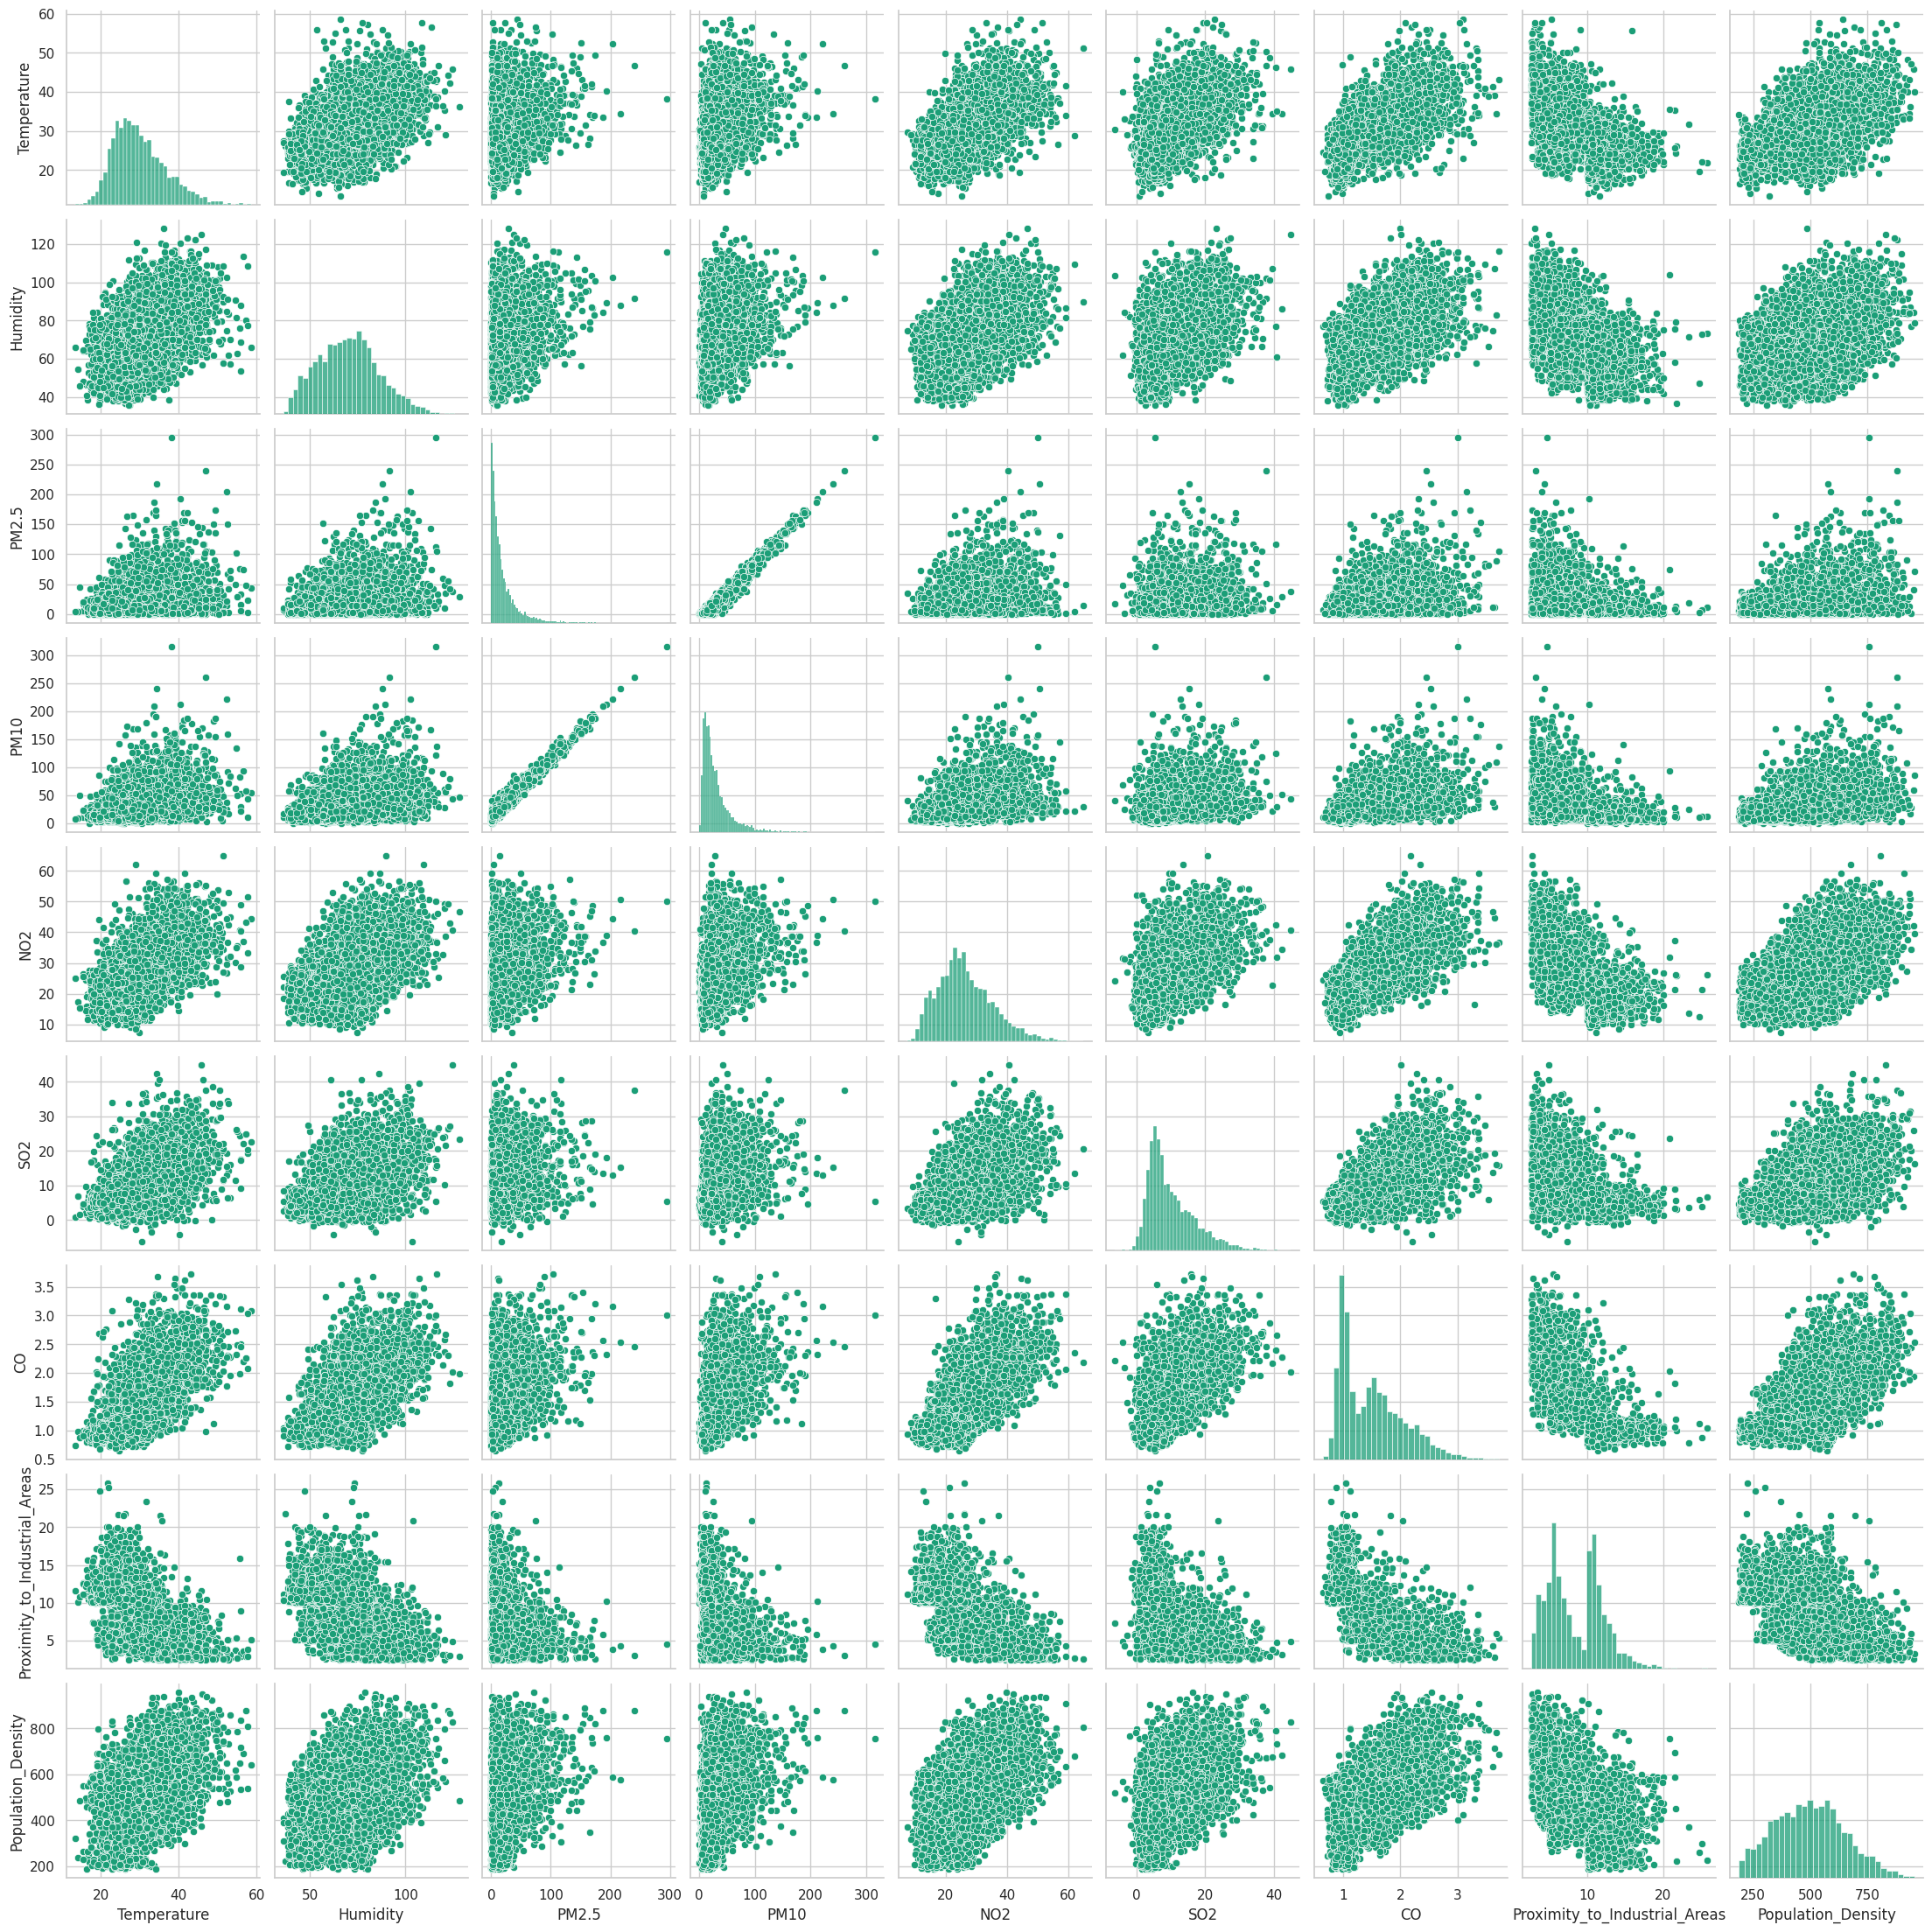

In [35]:
sns.pairplot(df);

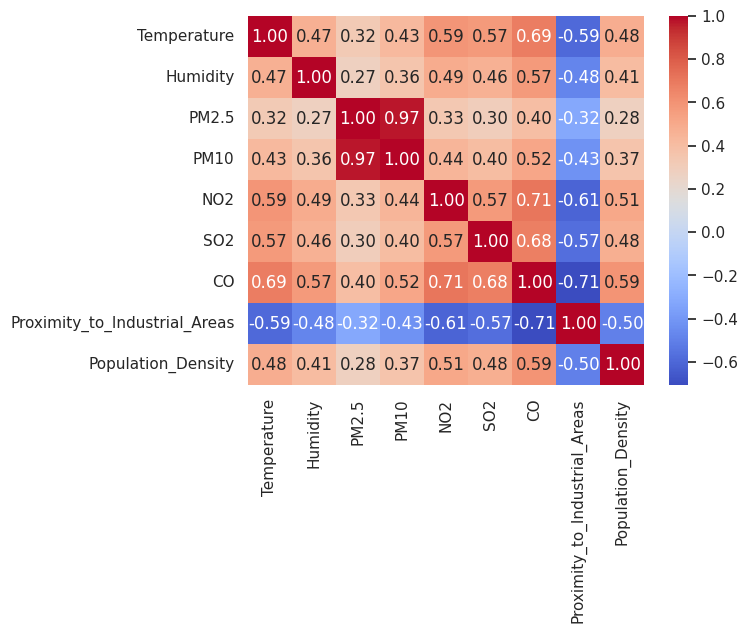

In [36]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f');

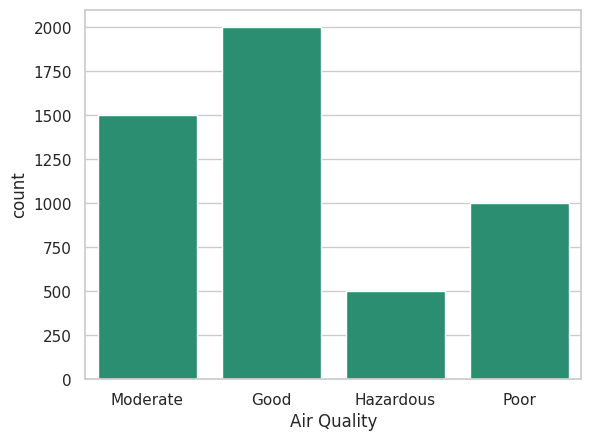

In [37]:
sns.countplot(x='Air Quality', data=df);

### Preprocessing

In [38]:
# Split the dataset into X and y
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

In [39]:
# Encode the categorical columns with pandas dummies
y = pd.get_dummies(y)

In [40]:
y = y.astype('int64')

In [41]:
# Convert the encoded columns to a single column
y = y.idxmax(axis=1)

In [42]:
y[1]

'Moderate'

In [43]:
# Standardize the numerical columns
stc = StandardScaler()

X = stc.fit_transform(X)

In [44]:
X

array([[-0.03408041, -0.69071534, -0.60858932, ...,  0.40230264,
        -0.58865846, -1.16816284],
       [-0.25729505,  0.34950721, -0.72670554, ...,  0.25577499,
        -0.67174754,  0.74359753],
       [-1.03110581,  0.2927678 ,  0.26709986, ...,  0.23745904,
        -0.89331843,  0.79597453],
       ...,
       [-0.61443848,  0.51342107, -0.24202176, ...,  0.23745904,
         0.32532146, -0.77533537],
       [-0.70372434, -1.61745907,  0.0512323 , ..., -1.11792167,
         0.87924868, -1.67883856],
       [-0.88229605,  0.49450793,  2.50723499, ..., -0.22043985,
        -0.03473124, -0.23847116]], shape=(5000, 9))

### Training, Predicting and Evaluating

In [45]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Initialize the SVC model
svc = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the model to the data
svc.fit(X_train, y_train)

SVC()

In [47]:
# Predict the test set
y_pred = svc.predict(X_test)

In [48]:
# Evaluate the model
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {acc}')
print(f'Report: {report}')

Accuracy: 0.94
Report:               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       618
   Hazardous       0.87      0.82      0.85       148
    Moderate       0.95      0.95      0.95       452
        Poor       0.84      0.85      0.84       282

    accuracy                           0.94      1500
   macro avg       0.91      0.91      0.91      1500
weighted avg       0.94      0.94      0.94      1500



### Hyperparameter Tuning

In [49]:
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5]
}

# Initialize the SVC model
svc = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')


Best Parameters: {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


In [52]:
# Initialize the SVC model with the best parameters
svc_best = SVC(**best_params)
svc_best.fit(X_train, y_train)

# Predict the test set
y_pred_best = svc_best.predict(X_test)

In [53]:
# Evaluate the model
acc_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print(f'Accuracy: {acc_best}')
print(f'Report: {report_best}')

Accuracy: 0.9353333333333333
Report:               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       618
   Hazardous       0.85      0.83      0.84       148
    Moderate       0.95      0.94      0.94       452
        Poor       0.83      0.84      0.83       282

    accuracy                           0.94      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.94      0.94      0.94      1500

